In [1]:
import sys

sys.path.append('/home/radlr/anaconda3/envs/lVGPU2/lib/python3.6/site-packages')

#hint from https://stackoverflow.com/questions/19876079/opencv-cannot-find-module-cv2

# math etc.
from scipy import misc
import numpy as np

#plotting
import matplotlib as mpl
from matplotlib import pyplot as plt

#image functions, esp. resizing
import cv2
#directory functions
import os

#Data management

import pandas as pd

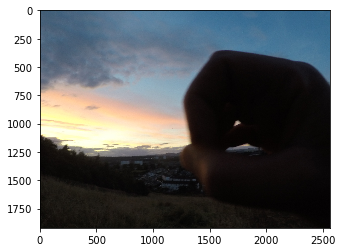

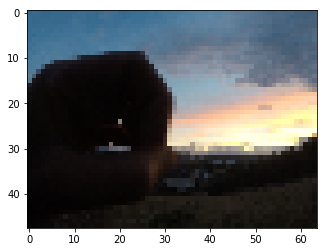

Target vector shape:  ()
Training vector shape:  (48, 64, 3)


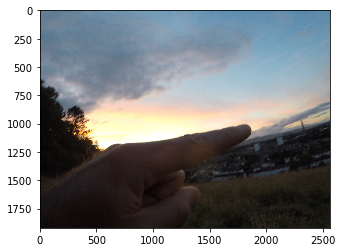

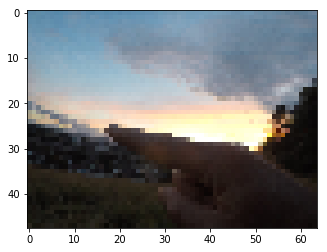

Target vector shape:  ()
Training vector shape:  (48, 64, 3)


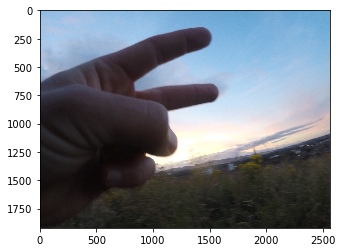

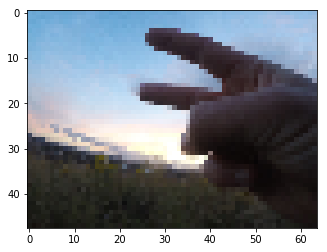

Target vector shape:  ()
Training vector shape:  (48, 64, 3)


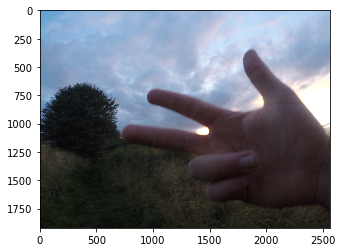

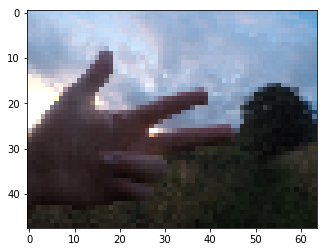

Target vector shape:  ()
Training vector shape:  (48, 64, 3)


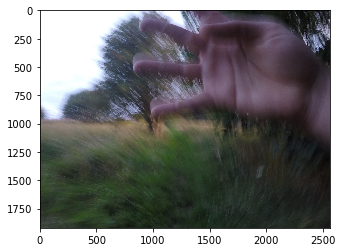

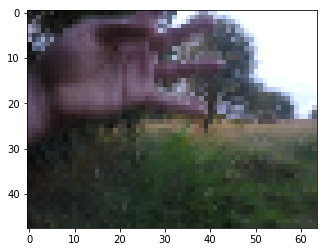

Target vector shape:  ()
Training vector shape:  (48, 64, 3)


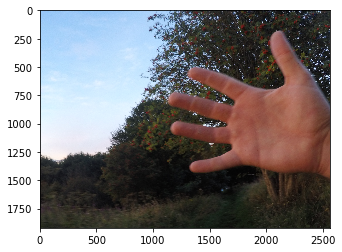

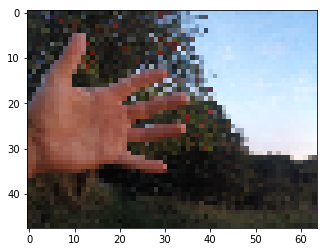

Target vector shape:  ()
Training vector shape:  (48, 64, 3)


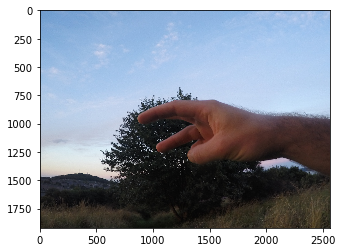

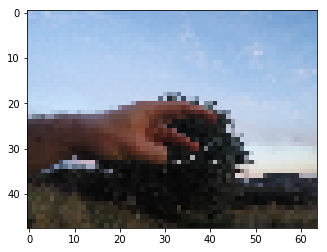

Target vector shape:  ()
Training vector shape:  (48, 64, 3)


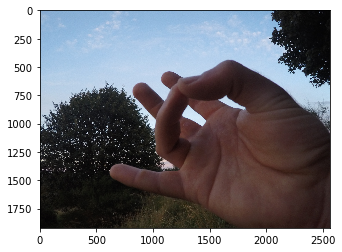

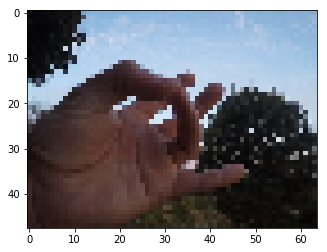

Target vector shape:  ()
Training vector shape:  (48, 64, 3)


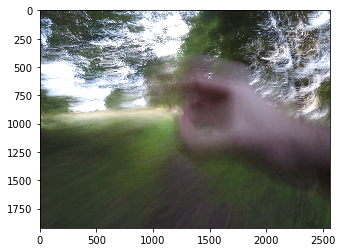

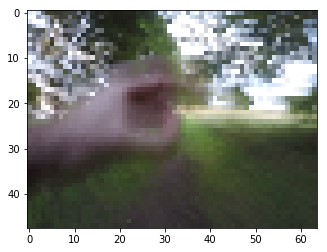

Target vector shape:  ()
Training vector shape:  (48, 64, 3)


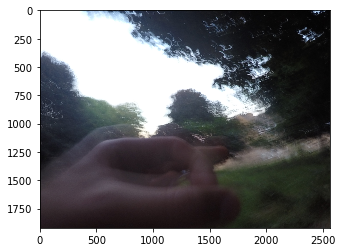

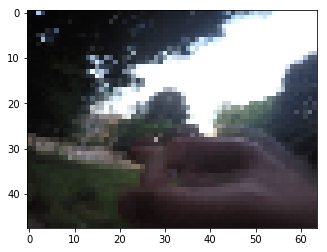

Target vector shape:  ()
Training vector shape:  (48, 64, 3)


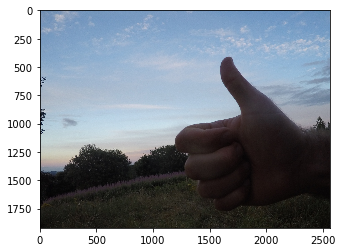

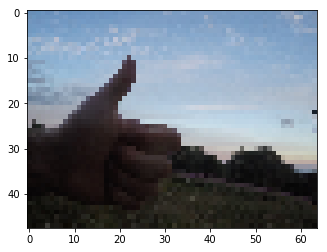

Target vector shape:  ()
Training vector shape:  (48, 64, 3)


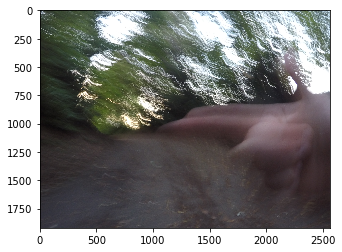

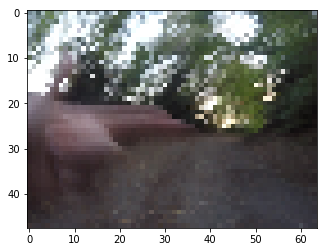

Target vector shape:  ()
Training vector shape:  (48, 64, 3)


In [2]:
# The full-size simulated RGB image stack is the training target
# now to create an input stack using the cuttleVision function
myDimX = 64
myDimY = 48

myTargets = []
myImgs = []

for c in range(0,12):
    myDir = str('./outdoors0to12/') + str(c)
    #all of the images in this directory are labelled '0'
    myMiniDir = os.listdir(myDir)


    #myC = 0 
    for k in myMiniDir:
        #myC = myC+1 

        #print(k)

        myImg = cv2.imread(myDir+'/'+str(k))
        myImg = cv2.cvtColor(myImg, cv2.COLOR_BGR2RGB)
        myResImg = cv2.resize(myImg,(myDimX,myDimY))
        myTargets.append(c)
        myTargets.append(c)
        myImgs.append(myResImg)
        myImgs.append(np.fliplr(myResImg))


    plt.figure()
    plt.imshow(myImg)
    plt.figure()
    plt.imshow(myImgs[len(myImgs)-1])
    plt.show()
    print("Target vector shape: ", np.shape(myTargets[0]))
    print("Training vector shape: ", np.shape(myImgs[0]))
            
        

        

In [3]:
myImgs = np.array(myImgs)
myTargets = np.array([myTargets])


In [6]:

myTargets = myTargets.T

In [7]:
print(np.shape(myImgs))
print(np.shape(myTargets))

(2884, 48, 64, 3)
(2884, 1)


In [8]:
myTargets[0]

array([0])

Saved training img number  0


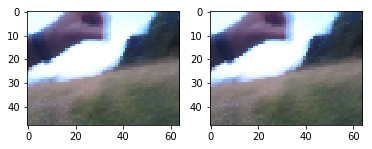

Saved training img number  500


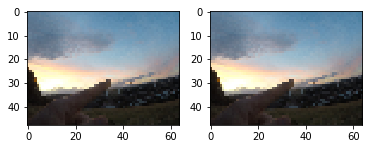

Saved training img number  1000


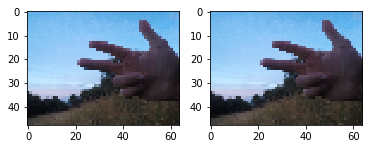

Saved training img number  1500


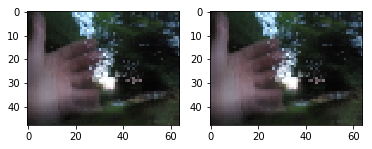

Saved training img number  2000


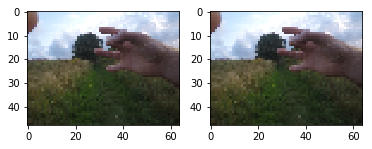

Saved training img number  2500


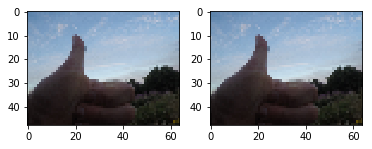

In [16]:

mySize = np.shape(myImgs)[0] #length of training image vector

for c in range(0,mySize):
    myImg = myImgs[c,:]
    
    cv2.imwrite('./outdoors0to12/outdoors0to12Imgs/wheraMItrainImg'+str(c)+'.tif',
                cv2.cvtColor(myImg, cv2.COLOR_BGR2RGB))
    
    if(c % 500 == 0):
        print("Saved training img number ", c)
        plt.figure()

        plt.subplot(121)
        plt.imshow(myImg)
        plt.subplot(122) 
        plt.imshow(myImg)
        #plt.colorbar()
        plt.show()


In [15]:
cd outdoors0to12
ls

SyntaxError: invalid syntax (<ipython-input-15-152dbcac9239>, line 1)

In [24]:
%store myImgs
%store myTargets

Stored 'myImgs' (ndarray)
Stored 'myTargets' (ndarray)


In [10]:
# Save the resized data and labels
np.save('./outdoors0to12/out012Tgts.npy',myTargets)
np.save('./outdoors0to12/out012Imgs.npy',myImgs)